# Derivative of Matrix

## import library

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load image 

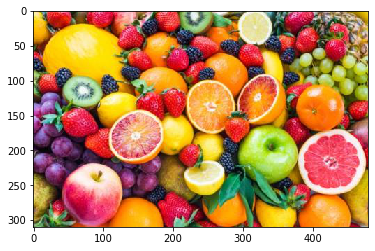

In [35]:
I = img.imread('fruits.jpg')
plt.imshow(I)

## check the size of image

In [36]:
n_row = I.shape[0]
n_col = I.shape[1]
print(I.shape)

(310, 480, 3)


## convert the input image into gray scale if it is color

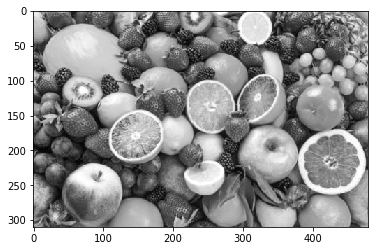

In [37]:
if I.shape[2] == 3:
    I = np.dot(I, [0.299, 0.587, 0.144])
    plt.imshow(I, cmap='gray', vmin=0, vmax=255)
    

## normalize input image so that the range of image is $[0, 1]$

In [45]:
I = (I - 0) / (255 - 0)   
print(I)

[[235.768 230.684 222.521 ... 208.499 213.184 216.119]
 [227.295 226.132 224.116 ... 204.833 209.075 211.412]
 [226.996 230.086 233.187 ... 199.406 202.773 205.708]
 ...
 [134.343 141.697 155.53  ... 153.523 162.693 170.512]
 [105.06  116.833 129.636 ... 163.148 172.318 182.507]
 [105.215 122.282 135.661 ... 184.269 183.006 181.566]]
[[5.46284827 5.44104881 5.40502148 ... 5.33993425 5.36215564 5.37582918]
 [5.42624873 5.4211189  5.41216377 ... 5.32219501 5.34269304 5.35380884]
 [5.4249324  5.43845315 5.45184071 ... 5.29534295 5.31208713 5.32645769]
 ...
 [4.90039623 4.95369097 5.04683864 ... 5.03385039 5.09186499 5.13880568]
 [4.65453162 4.76074556 4.86473052 ... 5.09465776 5.14934161 5.20678853]
 [4.65600588 4.80632985 4.91015913 ... 5.21639665 5.20951894 5.20161922]]


```git commit -a -m "load image" ``` \
```git push origin master```

## generate a matrix to compute the derivative in $x$-direction

In [6]:
Dx = np.zeros(shape=(n_col,n_col))
for i in range(n_col):
    if(i==0): Dx[i][i] = -1
    else: 
        Dx[i][i-1] = 1
        Dx[i][i] = -1
print(Dx)

[[-1.  0.  0. ...  0.  0.  0.]
 [ 1. -1.  0. ...  0.  0.  0.]
 [ 0.  1. -1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -1.  0.  0.]
 [ 0.  0.  0. ...  1. -1.  0.]
 [ 0.  0.  0. ...  0.  1. -1.]]


## compute the derivative of $I$ with respect to $x$-direction

In [7]:
Ix = (I@Dx)
print(Ix)

[[-0.01993725 -0.03201176 -0.03722353 ...  0.01837255  0.0115098
  -0.84752549]
 [-0.00456078 -0.00790588 -0.00095686 ...  0.01663529  0.00916471
  -0.82906667]
 [ 0.01211765  0.01216078  0.00403922 ...  0.01320392  0.0115098
  -0.80669804]
 ...
 [ 0.02883922  0.05424706  0.0525098  ...  0.03596078  0.03066275
  -0.66867451]
 [ 0.04616863  0.05020784  0.03170588 ...  0.03596078  0.03995686
  -0.71571373]
 [ 0.06692941  0.05246667  0.00690588 ... -0.00495294 -0.00564706
  -0.71202353]]


```git commit -a -m "compute the derivative in x-direction"``` \
```git push origin master```

## generate a matrix to compute the derivative in $y$-direction

In [8]:
Dy = np.zeros(shape=(n_row,n_row))
for i in range(n_row):
    if(i==n_row-1): Dy[i][i] = -1
    else: 
        Dy[i][i+1] = 1
        Dy[i][i] = -1
print(Dy)

[[-1.  1.  0. ...  0.  0.  0.]
 [ 0. -1.  1. ...  0.  0.  0.]
 [ 0.  0. -1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -1.  1.  0.]
 [ 0.  0.  0. ...  0. -1.  1.]
 [ 0.  0.  0. ...  0.  0. -1.]]


## compute the derivative of $I$ with respect to $y$-direction

In [9]:
Iy = (Dy@I)
print(Iy)

[[-3.32274510e-02 -1.78509804e-02  6.25490196e-03 ... -1.43764706e-02
  -1.61137255e-02 -1.84588235e-02]
 [-1.17254902e-03  1.55058824e-02  3.55725490e-02 ... -2.12823529e-02
  -2.47137255e-02 -2.23686275e-02]
 [ 6.90588235e-03  1.48980392e-02  1.71137255e-02 ... -2.06313725e-02
  -2.12392157e-02 -2.18039216e-02]
 ...
 [-1.14835294e-01 -9.75058824e-02 -1.01545098e-01 ...  3.77450980e-02
   3.77450980e-02  4.70392157e-02]
 [ 6.07843137e-04  2.13686275e-02  2.36274510e-02 ...  8.28274510e-02
   4.19137255e-02 -3.69019608e-03]
 [-4.12607843e-01 -4.79537255e-01 -5.32003922e-01 ... -7.22623529e-01
  -7.17670588e-01 -7.12023529e-01]]


```git commit -a -m "compute the derivative in y-direction"``` \
```git push origin master```

## compute $L_2^2$ of the gradient of $I$

In [73]:
norm_gradient = np.zeros(shape=(n_row,n_col))
for i in range(n_row):
    for j in range(n_col):
        norm_gradient[i][j] = Ix[i][j]**2 + Iy[i][j]**2
print(norm_gradient)
print(norm_gradient.min())
print(norm_gradient.max())

[[1.50155763e-03 1.34341058e-03 1.42471494e-03 ... 5.44233464e-04
  3.92127735e-04 7.18640185e-01]
 [2.21756248e-05 3.02935363e-04 1.26632183e-03 ... 7.29671557e-04
  6.94760062e-04 6.87851893e-01]
 [1.94528581e-04 3.69836248e-04 3.09194864e-04 ... 5.99997078e-04
  5.83579869e-04 6.51237137e-01]
 ...
 [1.40188451e-02 1.24501405e-02 1.30686864e-02 ... 2.71787043e-03
  2.36489636e-03 4.49338288e-01]
 [2.13191163e-03 2.97744575e-03 1.56351942e-03 ... 8.15356464e-03
  3.35331126e-03 5.12259754e-01]
 [1.74724778e-01 2.32708730e-01 2.83075864e-01 ... 5.22209297e-01
  5.15082962e-01 1.01395501e+00]]
0.0
1.0139550128719723


## define functions for the visualization

In [80]:
def plot_image(I):
    
    plt.figure(figsize=(10,10))
    plt.imshow(I, cmap='gray', norm=colors.LogNorm(0.1,1))
    plt.title('input image')
    plt.axis('off')
        
def plot_image_derivative_x(Ix):
    
    plt.figure(figsize=(10,10))
    plt.imshow(Ix, cmap='gray', norm=colors.LogNorm(0.1,1))
    plt.title('image derivative of x')
    plt.axis('off')

    
def plot_image_derivative_y(Iy):
    
    plt.figure(figsize=(10,10))
    plt.imshow(Iy, cmap='gray', norm=colors.LogNorm(0.1,1))
    plt.title('image derivative of y')
    plt.axis('off')

    
def plot_norm_gradient(norm_gradient):

    plt.figure(figsize=(10,10))
    plt.imshow(norm_gradient, cmap='gray', vmin=0, vmax = 0.01)
    plt.title('norm gradient')
    plt.axis('off')

```git commit -a -m "define functions for the visualization"``` 
```git push origin master```

# ###################################################################

# # results

# ###################################################################

# # 01. plot the input image in gray scale

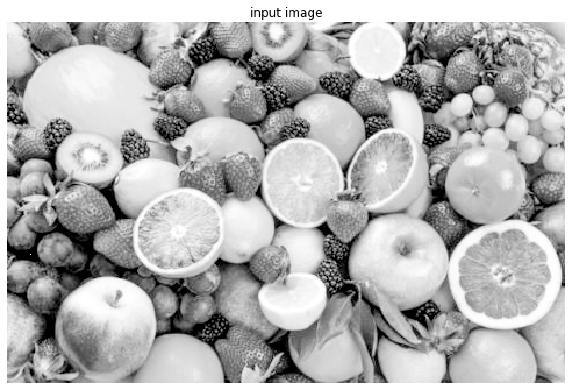

In [31]:
plot_image(I)

# # 02. plot the derivative $I_x$ of input image in x-direction

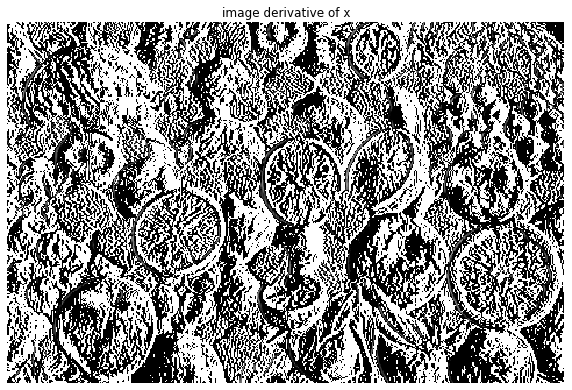

In [32]:
plot_image_derivative_x(Ix)

# # 03. plot the derivative $I_y$ of input image in y-direction

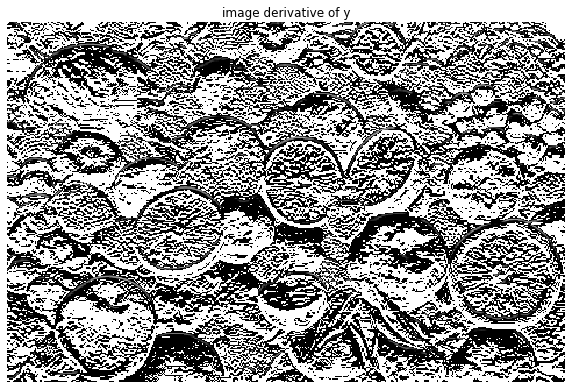

In [14]:
plot_image_derivative_y(Iy)

# # 04. plot $L_2^2$ norm $I_x^2 + I_y^2$ of the gradient of input image

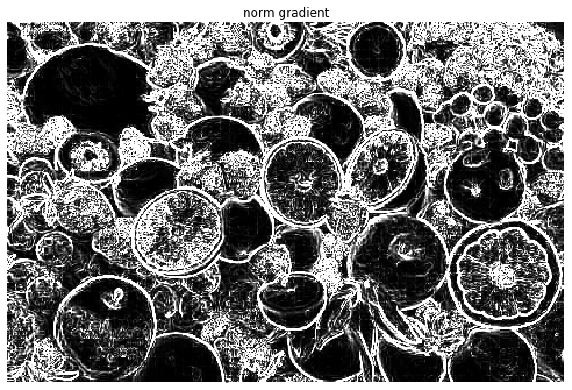

In [81]:
plot_norm_gradient(norm_gradient)